In [1]:
import pandas as pd

# Load data
results = pd.read_csv('ao_results.csv')
stats = pd.read_csv('ao_statistics.csv', index_col=0)

# Mapping function names
cec2014 = [f'F{i}2014' for i in range(1, 14)]
cec2017 = [f'F{i}2017' for i in range(1, 10)]
cec2020 = [f'F{i}2020' for i in range(1, 5)]
cec2022 = [f'F{i}2022' for i in range(1, 5)]

# Optional sanity check
print("Available columns in results:\n", results.columns.tolist())
print("Available indices in stats:\n", stats.index.tolist())


Available columns in results:
 ['Unnamed: 0', 'F12014', 'F22014', 'F32014', 'F42014', 'F52014', 'F62014', 'F72014', 'F82014', 'F92014', 'F102014', 'F112014', 'F122014', 'F132014', 'F12017', 'F22017', 'F32017', 'F42017', 'F52017', 'F62017', 'F72017', 'F82017', 'F92017', 'F12020', 'F22020', 'F32020', 'F42020', 'F12022', 'F22022', 'F32022', 'F42022']
Available indices in stats:
 ['Mean', 'Std', 'Min', 'Median', 'Max']


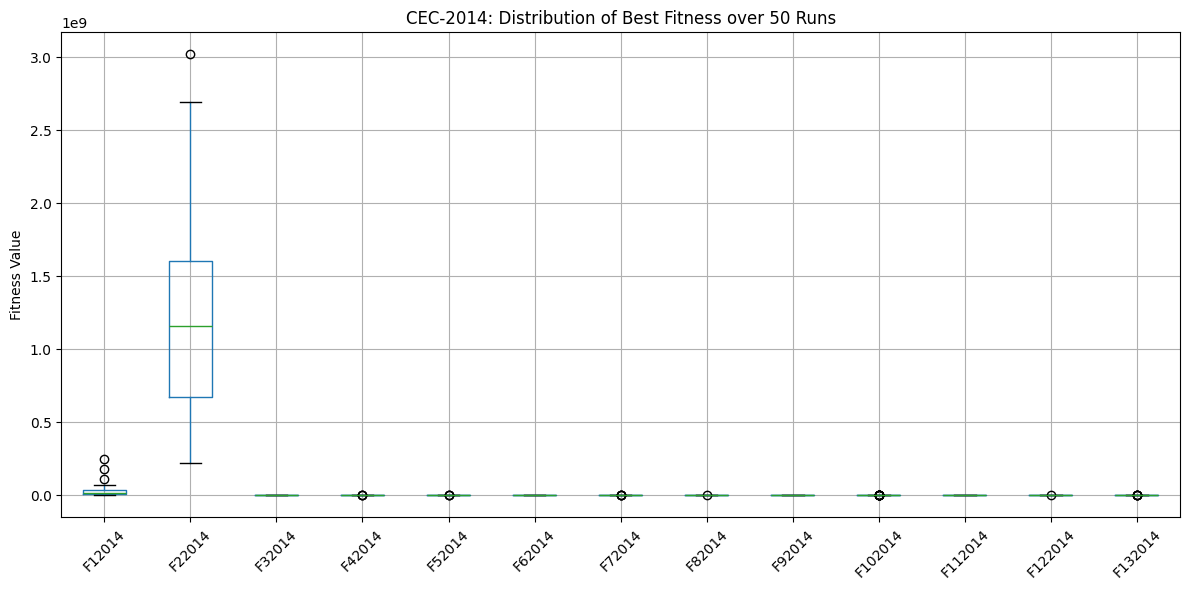

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
results[cec2014].boxplot()
plt.title('CEC‑2014: Distribution of Best Fitness over 50 Runs')
plt.ylabel('Fitness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


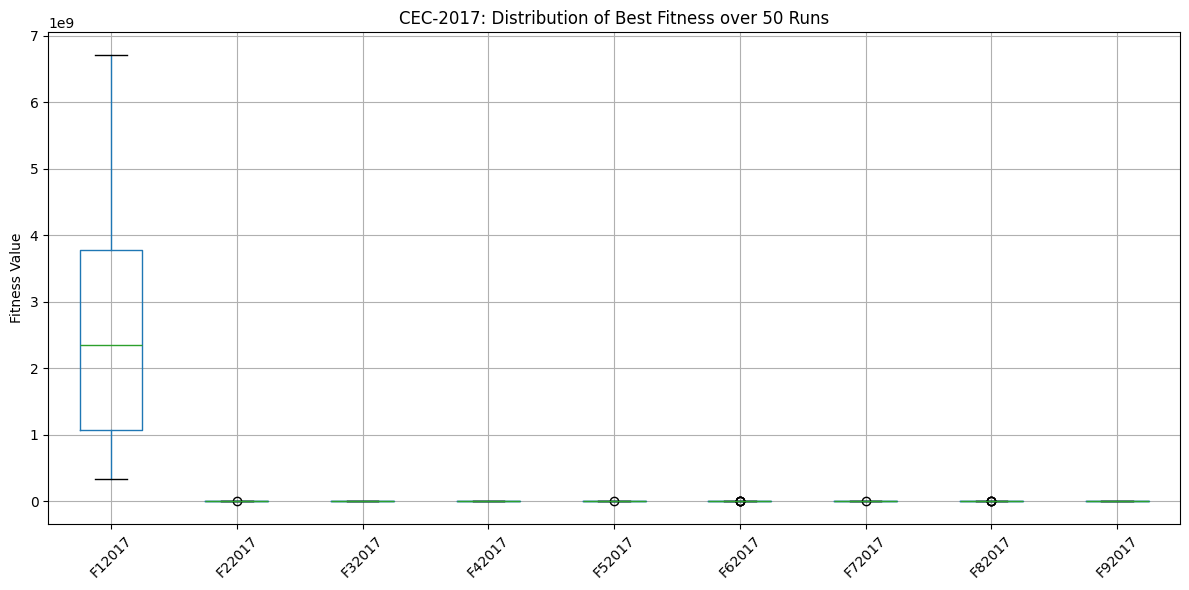

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
results[cec2017].boxplot()
plt.title('CEC‑2017: Distribution of Best Fitness over 50 Runs')
plt.ylabel('Fitness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


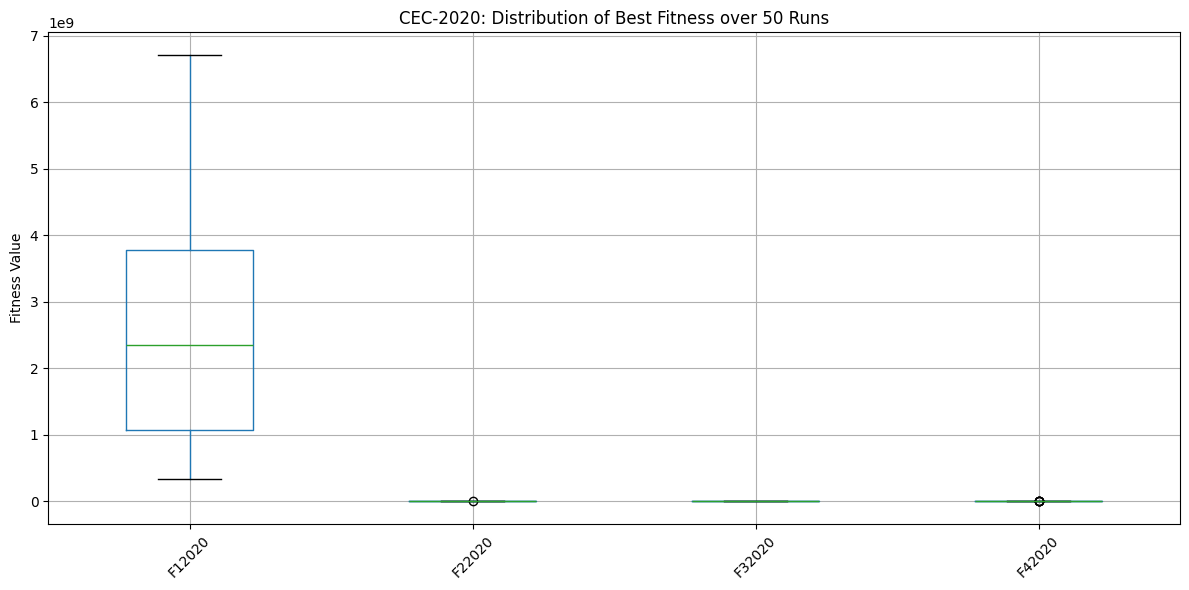

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
results[cec2020].boxplot()
plt.title('CEC‑2020: Distribution of Best Fitness over 50 Runs')
plt.ylabel('Fitness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


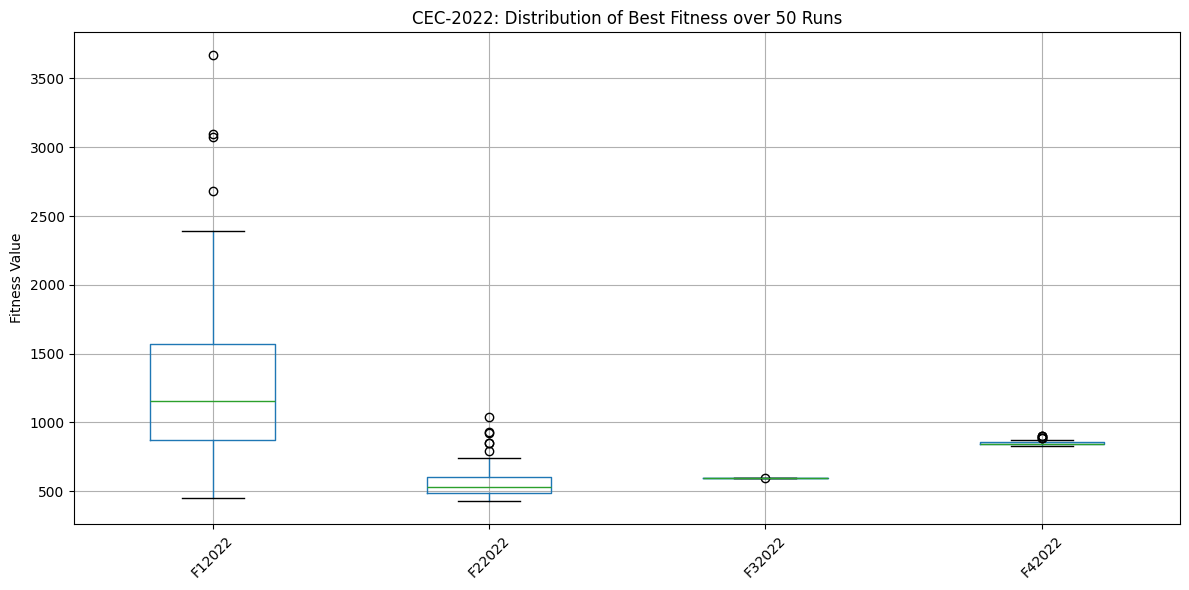

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
results[cec2022].boxplot()
plt.title('CEC‑2022: Distribution of Best Fitness over 50 Runs')
plt.ylabel('Fitness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
print("Available columns in stats:", stats.columns.tolist())
print("cec2014 list:", cec2014)
missing = [f for f in cec2014 if f not in stats.columns]
print("Missing columns from stats:", missing)


Available columns in stats: ['F12014', 'F22014', 'F32014', 'F42014', 'F52014', 'F62014', 'F72014', 'F82014', 'F92014', 'F102014', 'F112014', 'F122014', 'F132014', 'F12017', 'F22017', 'F32017', 'F42017', 'F52017', 'F62017', 'F72017', 'F82017', 'F92017', 'F12020', 'F22020', 'F32020', 'F42020', 'F12022', 'F22022', 'F32022', 'F42022']
cec2014 list: ['F12014', 'F22014', 'F32014', 'F42014', 'F52014', 'F62014', 'F72014', 'F82014', 'F92014', 'F102014', 'F112014', 'F122014', 'F132014']
Missing columns from stats: []


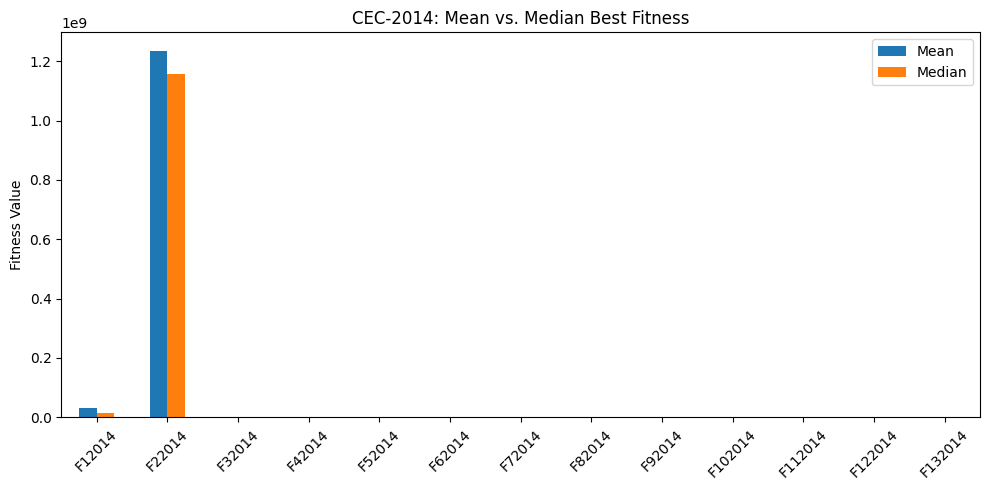

In [8]:
stats_subset = stats.loc[['Mean', 'Median'], cec2014].T  # Transpose to make functions on x-axis

stats_subset.plot.bar(figsize=(10, 5))
plt.title('CEC‑2014: Mean vs. Median Best Fitness')
plt.ylabel('Fitness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


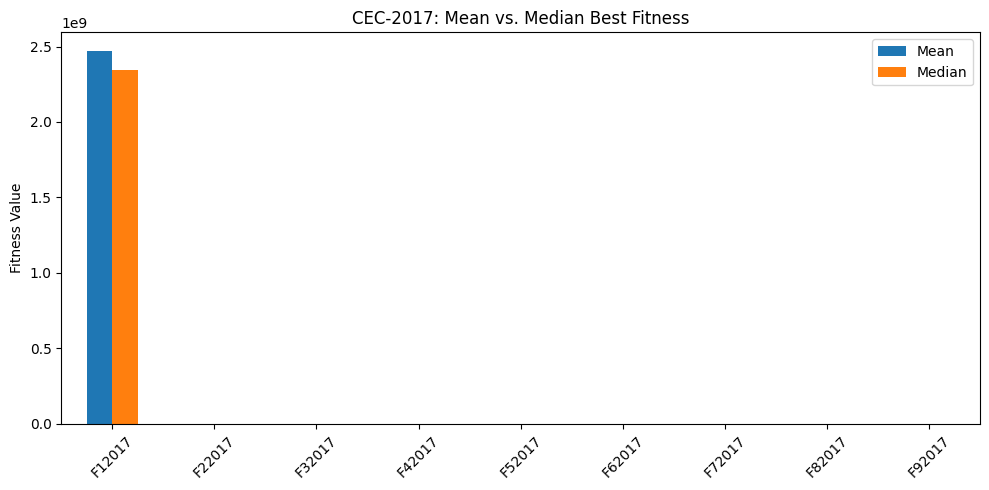

In [11]:
stats_subset = stats.loc[['Mean', 'Median'], cec2017].T  # Transpose to make functions on x-axis

stats_subset.plot.bar(figsize=(10, 5))
plt.title('CEC‑2017: Mean vs. Median Best Fitness')
plt.ylabel('Fitness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


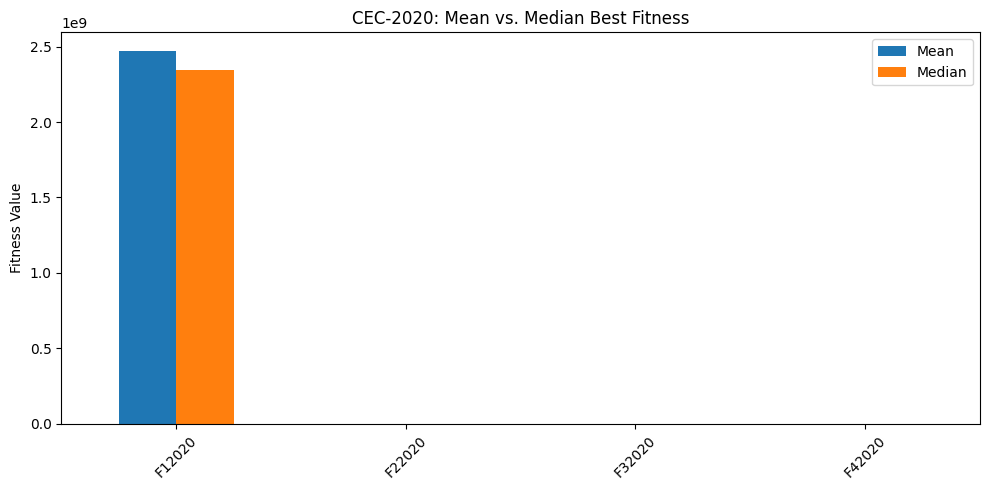

In [12]:
stats_subset = stats.loc[['Mean', 'Median'], cec2020].T  # Transpose to make functions on x-axis

stats_subset.plot.bar(figsize=(10, 5))
plt.title('CEC‑2020: Mean vs. Median Best Fitness')
plt.ylabel('Fitness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


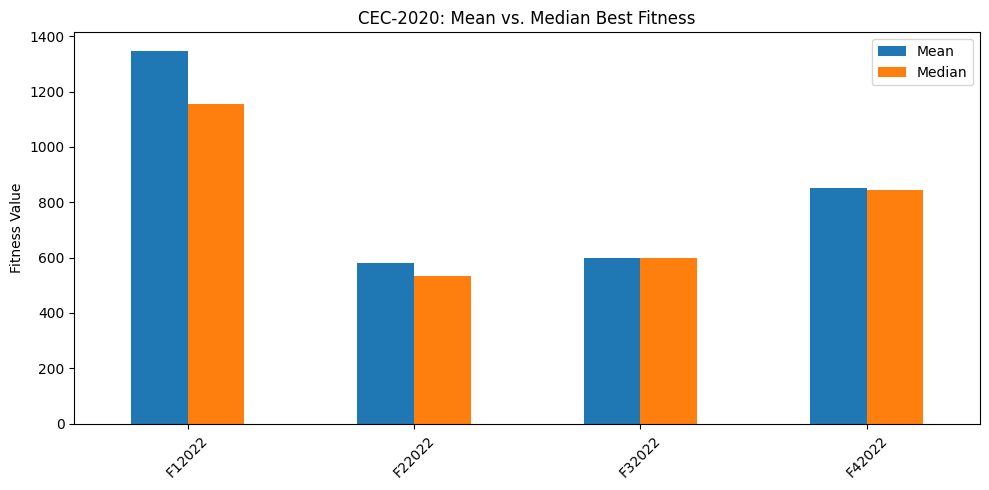

In [13]:
stats_subset = stats.loc[['Mean', 'Median'], cec2022].T  # Transpose to make functions on x-axis

stats_subset.plot.bar(figsize=(10, 5))
plt.title('CEC‑2020: Mean vs. Median Best Fitness')
plt.ylabel('Fitness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


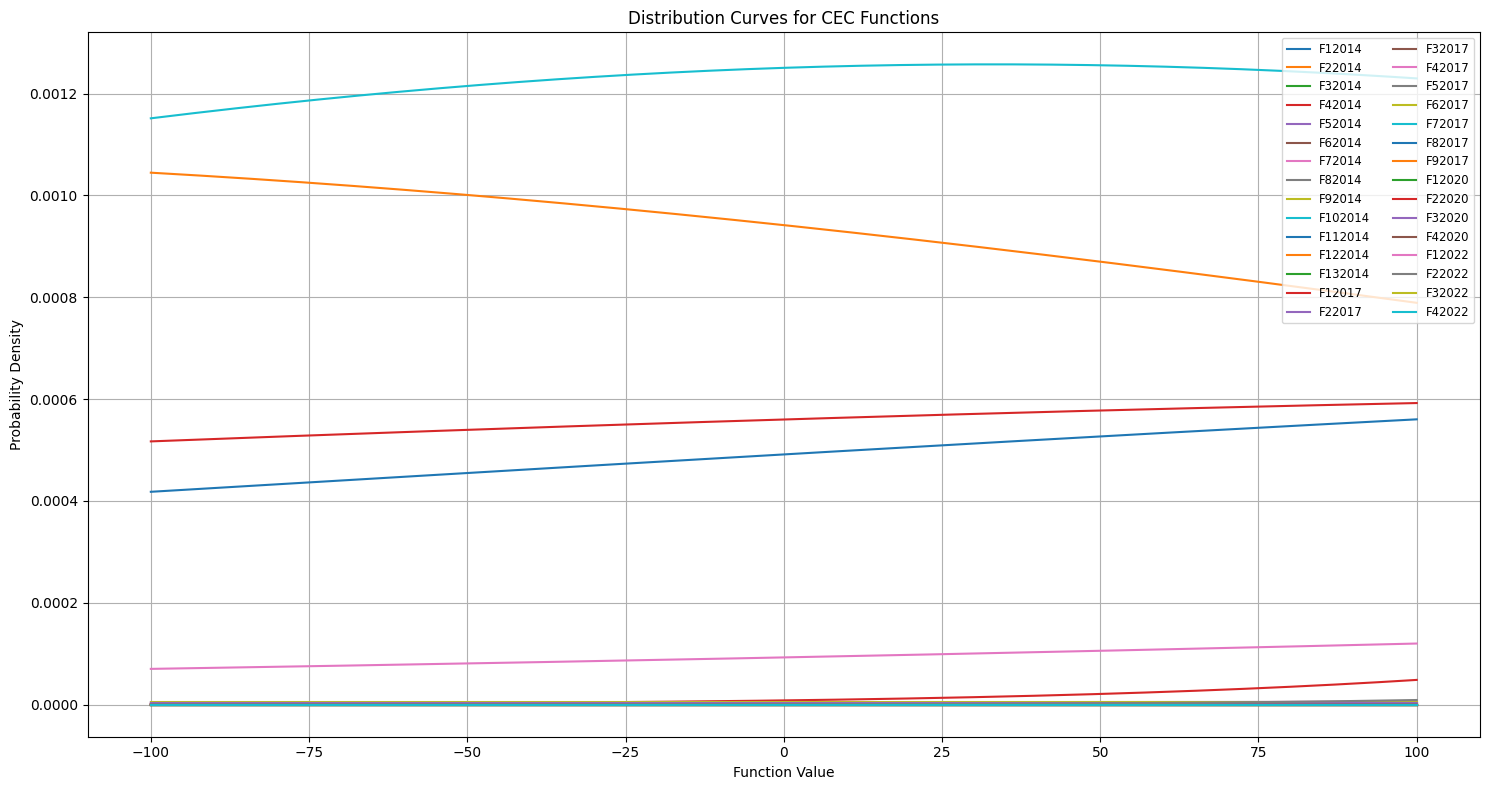

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

all_cec_funcs = cec2014 + cec2017 + cec2020 + cec2022

plt.figure(figsize=(15, 8))

x_values = np.linspace(-100, 100, 500)

for func in all_cec_funcs:
    if func in stats.columns:
        mu = stats.loc['Mean', func]
        sigma = stats.loc['Std', func]
        if sigma > 0:
            y_values = norm.pdf(x_values, mu, sigma)
            plt.plot(x_values, y_values, label=func)

plt.title('Distribution Curves for CEC Functions')
plt.xlabel('Function Value')
plt.ylabel('Probability Density')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


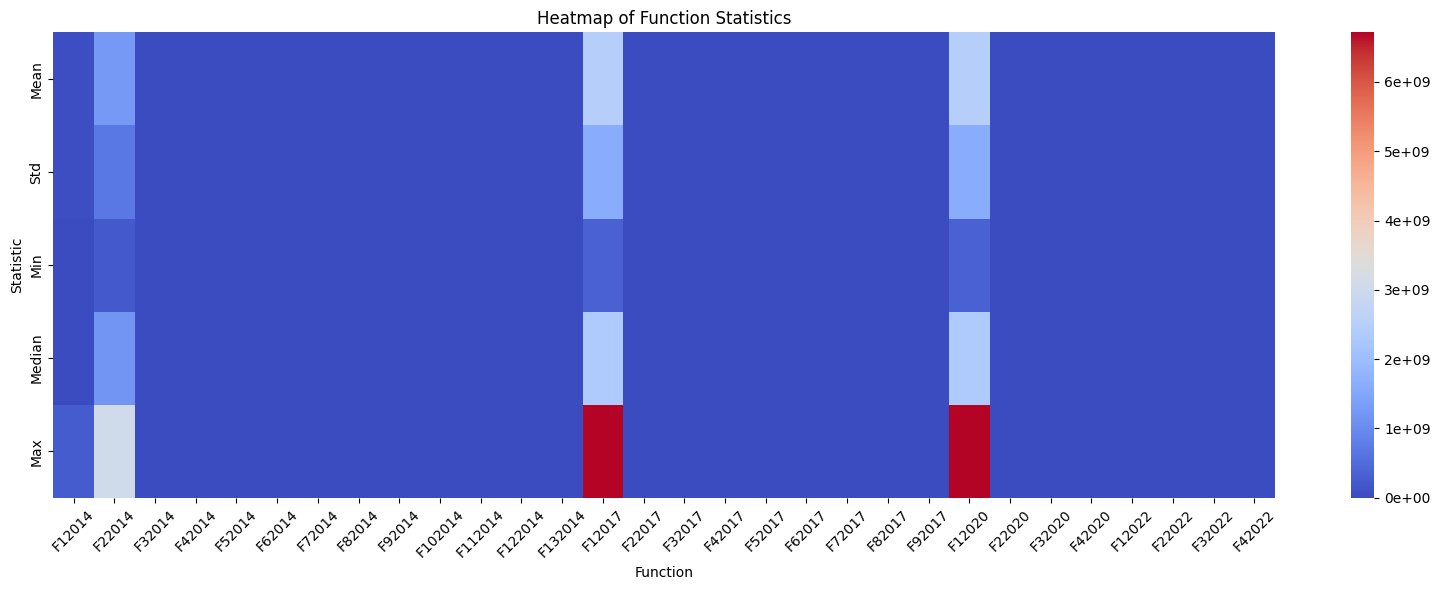

In [23]:
plt.figure(figsize=(16, 6))
sns.heatmap(stats, annot=False, cmap='coolwarm', cbar_kws={'format': '%.0e'})
plt.title("Heatmap of Function Statistics")
plt.xlabel("Function")
plt.ylabel("Statistic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


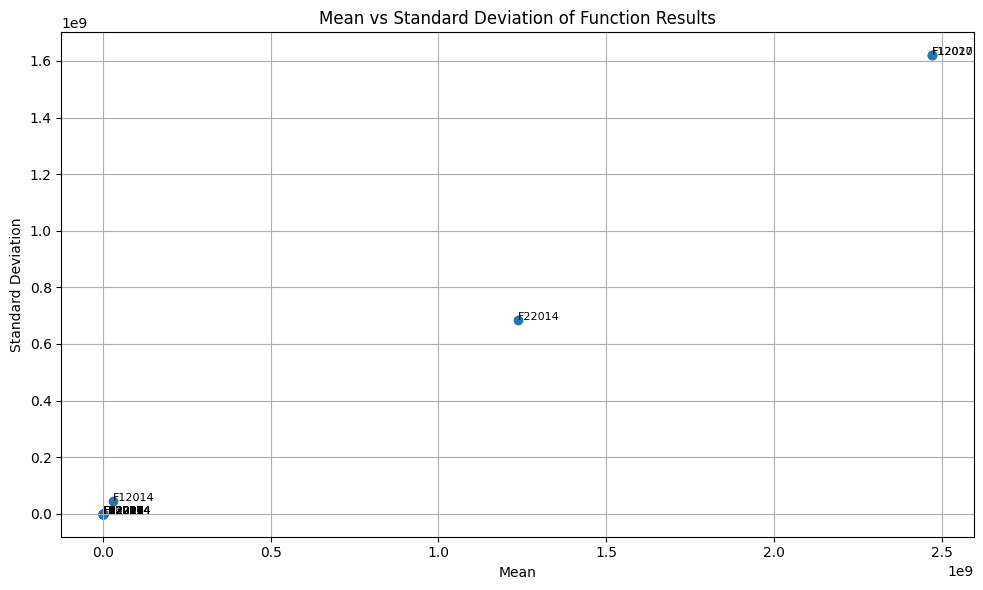

In [ ]:
mean_vals = stats.loc['Mean']
std_vals = stats.loc['Std']

plt.figure(figsize=(10, 6))
plt.scatter(mean_vals, std_vals)

for func in mean_vals.index:
    plt.annotate(func, (mean_vals[func], std_vals[func]), fontsize=8)

plt.title("Mean vs Standard Deviation of Function Results")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.grid(True)
plt.tight_layout()
plt.show()


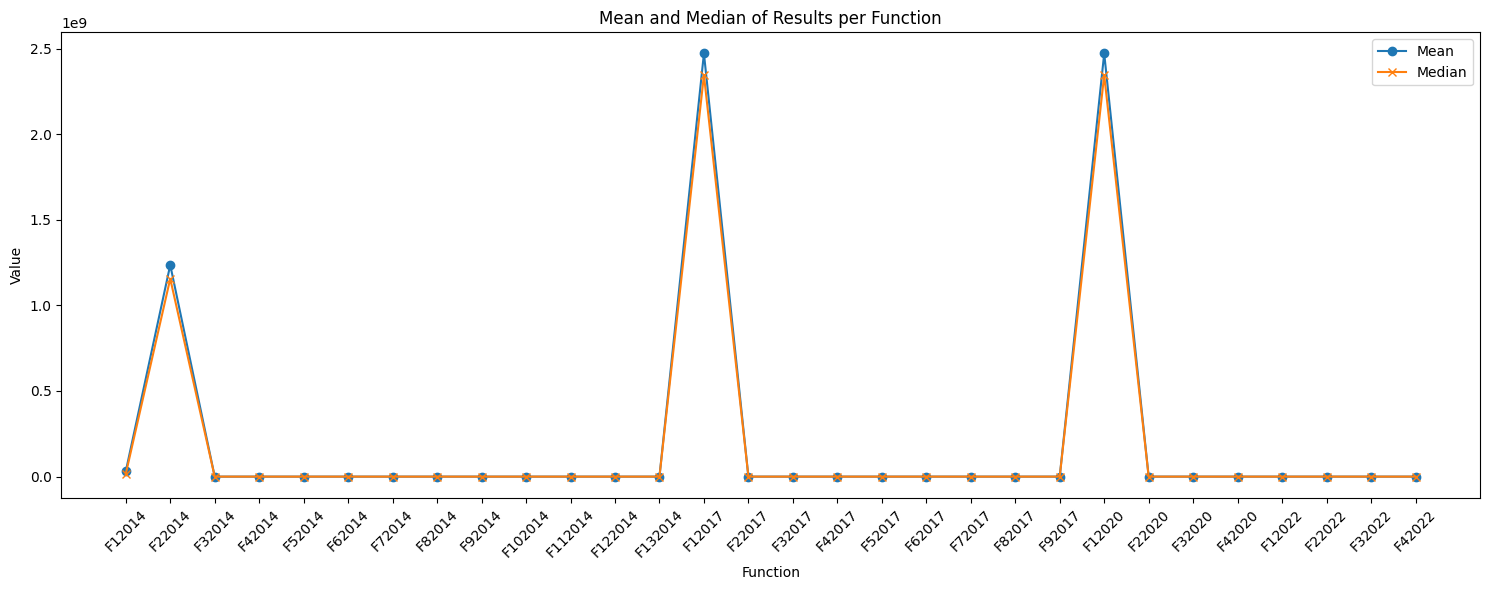

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(stats.columns, stats.loc['Mean'], label='Mean', marker='o')
plt.plot(stats.columns, stats.loc['Median'], label='Median', marker='x')
plt.xticks(rotation=45)
plt.title("Mean and Median of Results per Function")
plt.xlabel("Function")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\HARSHDIP\AppData\Local\Temp\ipykernel_27372\2303481156.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=results.drop(columns='Unnamed: 0'), scale='width', inner='quartile')


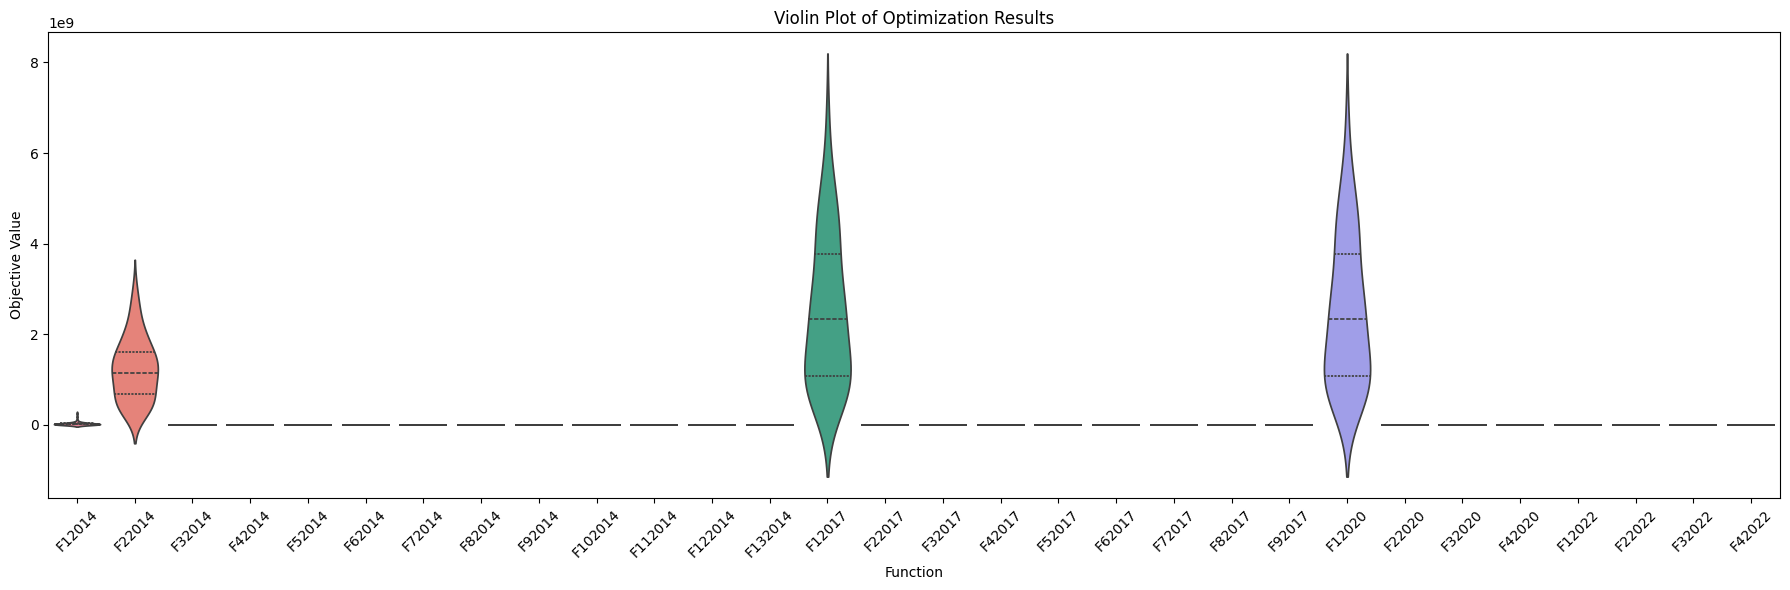

In [21]:
plt.figure(figsize=(18, 6))
sns.violinplot(data=results.drop(columns='Unnamed: 0'), scale='width', inner='quartile')
plt.xticks(rotation=45)
plt.title("Violin Plot of Optimization Results")
plt.xlabel("Function")
plt.ylabel("Objective Value")
plt.tight_layout()
plt.show()


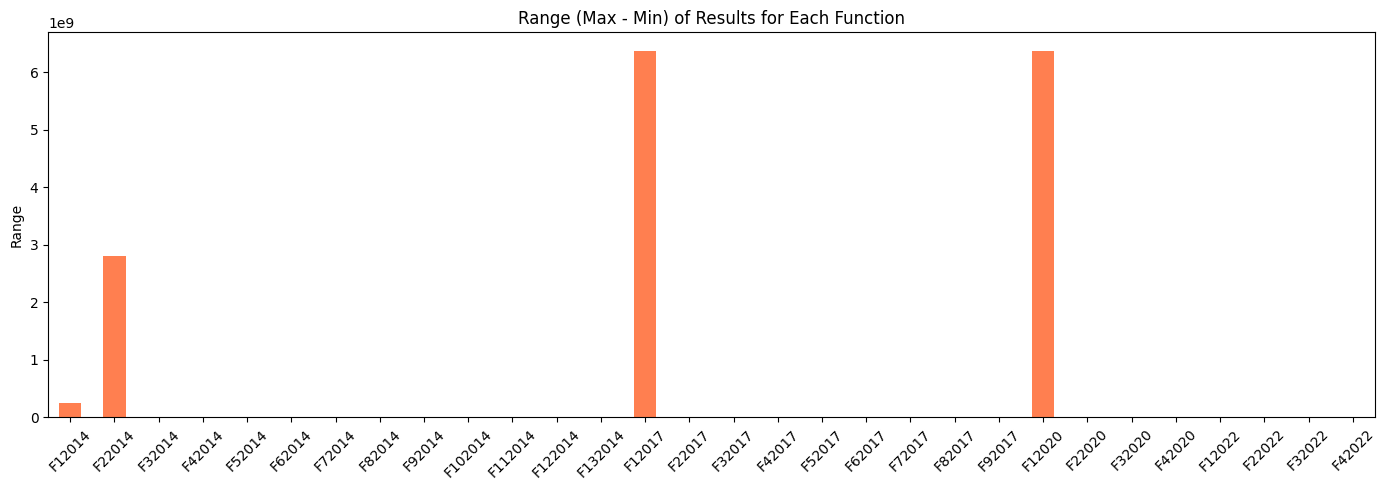

In [22]:
range_vals = stats.loc['Max'] - stats.loc['Min']

plt.figure(figsize=(14, 5))
range_vals.plot(kind='bar', color='coral')
plt.title("Range (Max - Min) of Results for Each Function")
plt.ylabel("Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
